In [2]:
import sqlite3
from config import db_path
from statements import get_success_rate_for_n_days_holding, get_grouped_data
import matplotlib.pyplot as plt


def connect_to_db(is_row_factory=True):
    connection = sqlite3.connect(db_path / "sp500.sqlite")
    if is_row_factory:
        connection.row_factory = sqlite3.Row
    cursor = connection.cursor()
    return connection, cursor


connection, cursor = connect_to_db(is_row_factory=True)

In [ ]:
returns = []
for i in range(2, 100):
    returns.append(cursor.execute(get_success_rate_for_n_days_holding(i)).fetchone()['positivity_rate'])

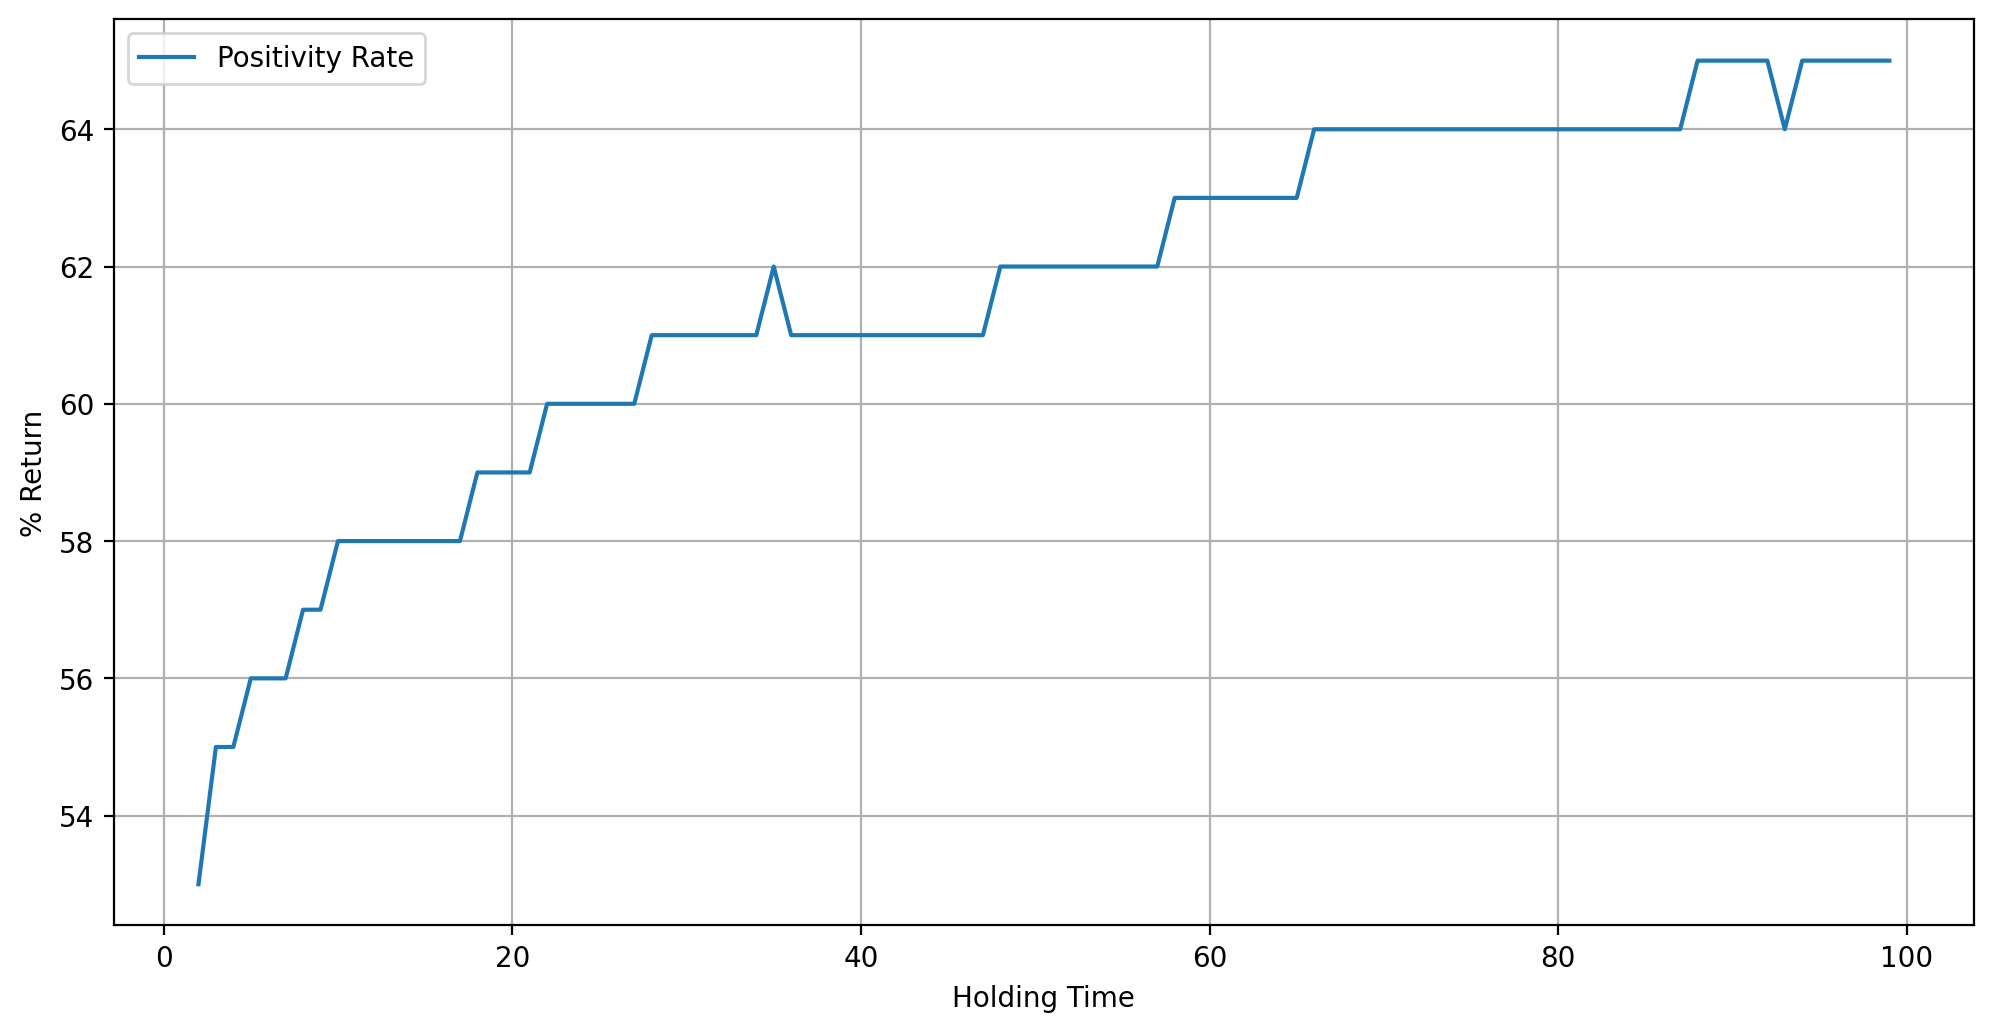

In [30]:

plt.figure(figsize=(12, 6), dpi=200)
plt.plot(list(range(2, 100)), returns, label='Positivity Rate')
plt.xlabel("Holding Time")
plt.ylabel("% Return")
plt.grid()
plt.legend()

In [23]:
print(returns.index(max(returns)))
print(returns.index(min(returns)))

86
0


In [ ]:
strategies_table = {}

for i in range(2, 101):
    print(i)
    strategies_data = cursor.execute(get_grouped_data("entry", i)).fetchall()
    strategies_table[i] = list(
        map(lambda val: (val['entry'], val['positive_return'], val['negative_return'], val['positivity_ratio']),
            strategies_data))

In [7]:
def compute_generally_most_profitable_holding_time(strategies_data: dict):
    return sorted(list(range(2, 101)), key=lambda x: strategies_data[x][-1])


def compute_most_negative_holding_time(strategies_data: dict):
    return sorted(list(range(2, 101)), key=lambda x: strategies_data[x][2])


def compute_most_negative_holding_time(strategies_data: dict):
    return sorted(list(range(2, 101)), key=lambda x: strategies_data[x][1])




In [23]:
import numpy as np

means = []
volatility = []
for day in strategies_table:
    values = []
    for row in strategies_table[day]:
        values.append(row[-1])
    means.append(np.array([i for i in values if i]).mean())
    volatility.append(np.array([i for i in values if i]).std())

In [28]:
sector_data = list(zip(means, volatility))

In [36]:
sorted_data_by_mean = sorted(sector_data, key=lambda x: x[0], reverse=True)

In [40]:
sector_data.index(sorted_data_by_mean[0])

60

In [ ]:
sector_data = []

for i in range(2, 101):
    print(i)
    strategies_data = cursor.execute(get_grouped_data("sector", i)).fetchall()
    sector_data.append(list(
        map(lambda val: (val['sector'], val['positive_return'], val['negative_return'], val['positivity_ratio']),
            strategies_data)))

In [87]:
import numpy as np

means = []
for v, _ in enumerate(sector_data):
    values = []
    for i, _ in enumerate(sector_data[v]):
        values.append(sector_data[v][i][-1])
    means.append(np.array(values).mean())

print(f"MAX: {means.index(max(means))} days -> {means[means.index(max(means))]:.2f}")
print(f"MIN: {means.index(min(means))} days -> {means[means.index(min(means))]:.2f}")
print(f"MEAN: {np.array(means).mean():.2f}")

MAX: 98 days -> 64.39
MIN: 0 days -> 52.94
MEAN: 61.03


In [77]:


sectors_analysis = {}


def count_sectors(query_data: list, data_collection: dict):
    for i, _ in enumerate(query_data):
        for j, _ in enumerate(query_data[i]):
            sector = query_data[i][j][0]

            # query_data[i][j] -> (sector, positive_return, negative_return, positivity_rate)
            if not sector in data_collection.keys():
                data_collection[sector] = {
                    "positive_returns": [],
                    "negative_returns": [],
                    "positivity_ratio": []
                }

            data_collection[sector]["positive_returns"].append(query_data[i][j][1])
            data_collection[sector]["negative_returns"].append(query_data[i][j][2])
            data_collection[sector]["positivity_ratio"].append(query_data[i][j][3])


In [78]:
count_sectors(sector_data, sectors_analysis)

In [79]:
ordered_by_positive_returns = sorted(sectors_analysis.keys(), key=lambda x: sectors_analysis[x]['positive_returns'],
                                     reverse=True)
ordered_by_negative_returns = sorted(sectors_analysis.keys(), key=lambda x: sectors_analysis[x]['negative_returns'],
                                     reverse=True)
ordered_by_positivity_ratio = sorted(sectors_analysis.keys(), key=lambda x: sectors_analysis[x]['positivity_ratio'],
                                     reverse=True)

In [86]:
print(f"Most profitable sector:         \t{ordered_by_positive_returns[0]}")
print(f"Least profitable sector:        \t{ordered_by_negative_returns[0]}")
print(f"Highest Positivity ratio sector:\t{ordered_by_positivity_ratio[0]}")

Most profitable sector:         	Industrials
Least profitable sector:        	Industrials
Highest Positivity ratio sector:	Real Estate
